In [2]:
import pandas as pd 
from scipy.stats import chi2_contingency
from dython.nominal import associations


# Read processed data from csv files

df = pd.read_csv('../data/processed/sanitary_registry_medicines.csv')

df = df[['manufacturer', 'pharmaceutical_form', 'expiration_date', 'register_year']]

df['expiration_date'] = pd.to_datetime(df['expiration_date'])


df['durability'] =  df['expiration_date'].dt.year - df['register_year']

df = df.drop(columns=['expiration_date','register_year'])







Chi-square test for independence between manufacturer and pharmaceutical form
Chi-square:  260566.29208882272
p-value:  0.0
Degrees of freedom:  125622


c:\Users\Carlos Olivo\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\Carlos Olivo\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


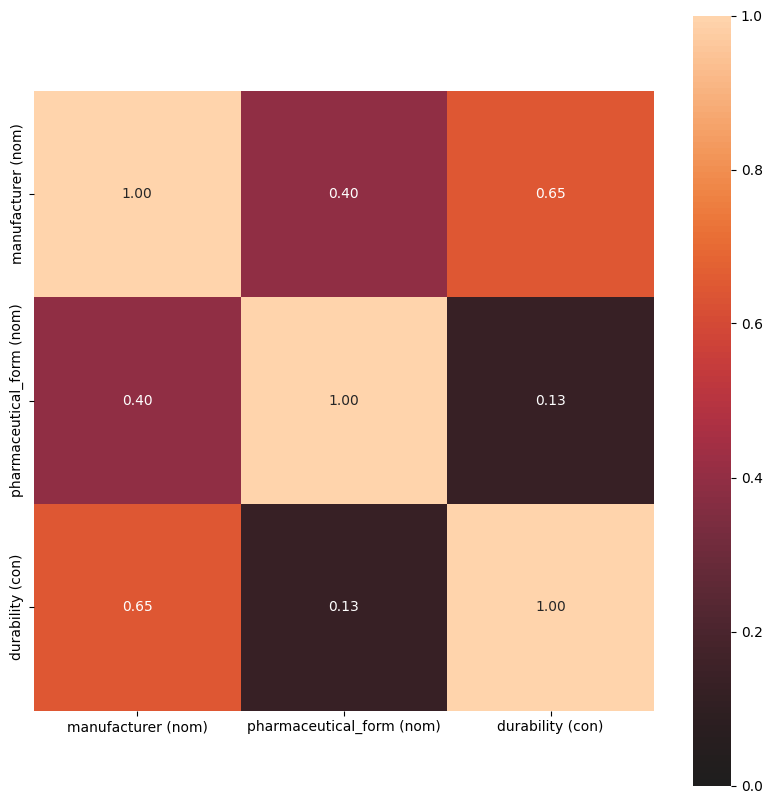

In [3]:
# Determine the relationship and correlation between variables using the Chi-square test for independence and the Cramer's V statistic


# Chi-square test for independence

# H0: There is no relationship between the variables

# H1: There is a relationship between the variables

# p-value < 0.05: reject H0

# p-value > 0.05: fail to reject H0

# p-value = 0.05: marginal

# Chi-square test for independence between manufacturer and pharmaceutical form

contingency_table = pd.crosstab(df['manufacturer'], df['pharmaceutical_form'])

chi2, p, dof, expected = chi2_contingency(contingency_table.values)

print('Chi-square test for independence between manufacturer and pharmaceutical form')

print('Chi-square: ', chi2)

print('p-value: ', p)

print('Degrees of freedom: ', dof)



# Correlations 

contingency_table = associations(df, nominal_columns=['manufacturer', 'pharmaceutical_form'], figsize=(10, 10), mark_columns=True, plot=True)

In [58]:
# Top 10 manufacturers with the highest durability of their products with at least product higher than mean of all products

manufacturers_by_product_count = df.groupby('manufacturer').size().reset_index(name='total').sort_values(by='total', ascending=False)

manufacturers_by_product_count = manufacturers_by_product_count[manufacturers_by_product_count['total'] > 50]


manufacturers_by_durability = df.groupby('manufacturer')['durability'].mean().reset_index(name='durability').sort_values(by='durability', ascending=False)

manufacturers_by_durability = manufacturers_by_durability.merge(manufacturers_by_product_count, on='manufacturer', how='inner')

mean_durability = manufacturers_by_durability['durability'].mean()

manufacturers_by_durability = manufacturers_by_durability[manufacturers_by_durability['durability']  >mean_durability ]

manufacturers_by_durability = manufacturers_by_durability.sort_values(by='durability', ascending=False)




print('Top 10 manufacturers with the highest durability of their products')

print(manufacturers_by_durability.head(10))










Top 10 manufacturers with the highest durability of their products
                        manufacturer  durability  total
0                             farqui   17.654545     55
1  industria farmaceutica del caribe   17.192708    192
2               laboratorios feltrex   16.620690    116
3             ethical pharmaceutical   16.569087    427
4           laboratorios dr. collado   16.481481    108
5                       delhi pharma   15.795181     83
6              laboratorios sintesis   15.536364    110
7          caplin point laboratories   15.494624     93
8    inmenol industrial laboratorios   15.295833    240
9               laboratorio laprofar   15.092593     54
